# Affinity Propagation
It's is a model based on graphs, the algorithm could be used with not distancial metrics, wich means that te algorithm don't process the distances between points and the metrics of similarity/disimilarity don't have to satisfy distances. The clusters have exemplars, this exemplar is the point on the center of the cluster

The algorithm works with a **similarity matrix** wich is the inverse of the euclidian distances, this makes that points that are near one each other have a very high similarity.

The algorithm initializes two matrix: **Responsability matrix** and **Availability matrix** These matrix are for compare the points one each other. The point that have hight responsability and with a large number of points will be choose as **exemplar** and will be the center of the cluster


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d
%matplotlib notebook

## Dataset
This dataset is about the pollution in India's cities in 2010. As everybody knows,india is one of the most polluted contries in the world.

In [130]:
df_pollution = pd.read_csv('C:/Users/alberto.rubiales/PycharmProjects/Pycharm/Affinity Propagation/pollution_india_2010.csv')
df_pollution_tomodel = df_pollution[['NO2', 'PM10', 'SO2']]
df_pollution_tomodel = df_pollution_tomodel[df_pollution_tomodel != 'Null']
df_pollution_tomodel.dropna(inplace=True)
df_pollution_tomodel.reset_index(drop=True, inplace=True)
print('Shape', df_pollution_tomodel.shape)
df_pollution_tomodel[:10]

Shape (175, 3)


NO2 PM10 SO2
0   9   39   4
1  11   81   2
2  24   79   5
3  11   62   2
4   9   85   4
5  23   85   5
6  12   65   2
7  23   76  11
8  12   68   4
9   9   37   4

## Hyperparameters
* damping: is a factor to control de number of clusters, between 0.5 and 1. Higher dumping, less examplers
* affinity: they kind of affinity is used by the algorithm
    * euclidean: the inverse euclidean distance
    * precomputed: if we have a distance matrix computed, we can pass to the algorithm
* convergence_iter: it's an early stopping criteria, if the number of iterations without change reach the convergence_iter, the algorithm will stop
* preference: is related with the responsability and the availability matrix, more preference, less clusters. Is strongly recommended to choose a very low preference (less than -1000) if not, the algorithm will infer a large number of clusters
* max_iter: the maximun number of iterations

In [145]:
AffinityPropagation?

In [143]:
ap = AffinityPropagation(damping=0.90,
                        affinity='euclidean',
                         preference=-8000.0,
                         max_iter=3000)
preds = ap.fit_predict(df_pollution_tomodel)

In [132]:
ap.cluster_centers_

array([[ 16.,  81.,   6.],
       [ 43., 289.,  15.],
       [ 35., 172.,  19.],
       [ 19.,  47.,   6.],
       [ 32., 214.,   9.],
       [ 25., 118.,   9.],
       [ 75., 118.,  12.]])

In [133]:
pd.DataFrame(ap.cluster_centers_, columns=df_pollution_tomodel.columns).T

0      1      2     3      4      5      6
NO2   16.0   43.0   35.0  19.0   32.0   25.0   75.0
PM10  81.0  289.0  172.0  47.0  214.0  118.0  118.0
SO2    6.0   15.0   19.0   6.0    9.0    9.0   12.0

In [139]:
print('Silhouette score:', silhouette_score(df_pollution_tomodel, preds))
print('Calinksi score:', calinski_harabasz_score(df_pollution_tomodel, preds))

Silhouette score: 0.42064559372576094
Calinksi score: 376.7781310416242


In [136]:
df_pollution_tomodel['preds'] = preds

In [137]:
df_pollution_tomodel = df_pollution_tomodel.astype(float)

<IPython.core.display.Javascript object>


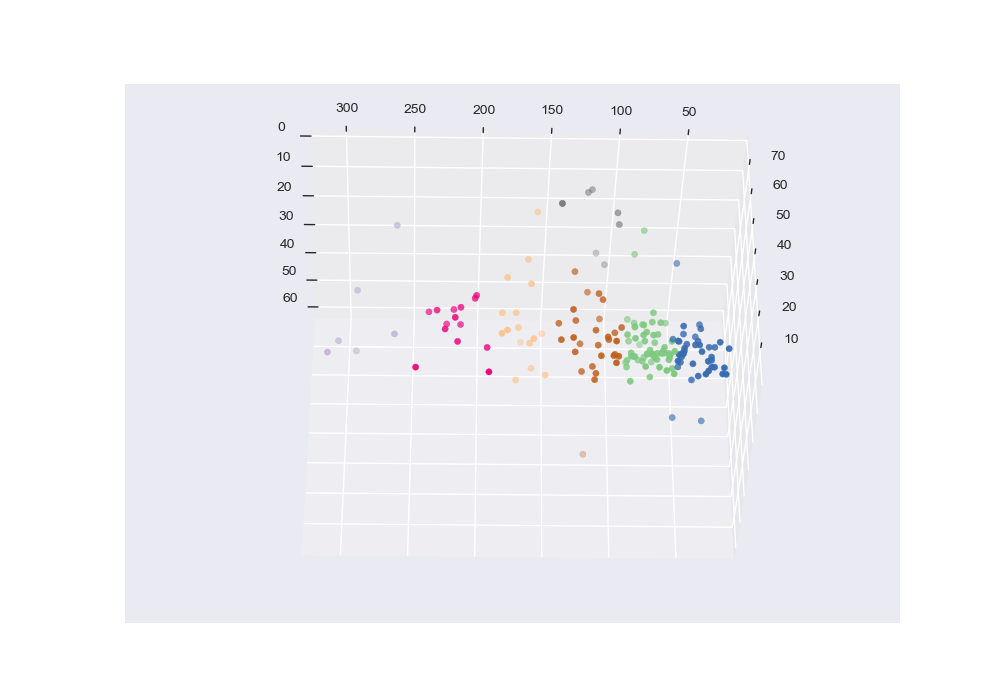

In [144]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(df_pollution_tomodel['SO2'], df_pollution_tomodel['PM10'],  df_pollution_tomodel['NO2'], c=preds, cmap='Accent')
plt.show()

## Conclusions of our data
We can see that there is  5 clusters in our data, so our cities are segmented in 7 kinds of differents cities, depending of the levels of PM10, SO2 and NO2:

This model is not bad, could be better if we use other algorithm.
## Conclusions of K-Means algorithm

### Pros
* We don't need to choose a number of cluster directly, the algorithm infer it with his hyperparameters

### Cons
* All clusters are spherical because we use a distance methods to create the clusters
* The algorithm does not discard points, all points of the dataset belong to a cluster, even if they are extremely far away.
* Is slow, the algorithm first need to determine what points will be exemplars in quantity and in localization and after make the clusters around the exemplars